<a href="https://colab.research.google.com/github/Abhinav4518/Abhinav4518/blob/main/Task2week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please download the dataset from the link provided and place it in the same directory.")
    exit()

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
print("Dataset loaded successfully.")
print("Shape of the dataset:", df.shape)


Dataset loaded successfully.
Shape of the dataset: (5974, 31)


In [4]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 no

In [5]:
print("\nChecking for null values:")
print(df.isnull().sum().max())



Checking for null values:
1


In [10]:
df.dropna(inplace=True)

In [11]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0.0    5970
1.0       3
Name: count, dtype: int64


In [12]:
X = df.drop('Class', axis=1)
y = df['Class']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print("\nData split into training and testing sets.")


Data split into training and testing sets.


In [15]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
print("\nModel training complete.")


Model training complete.


In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')
print("Note: Accuracy is not the best metric for imbalanced datasets.")



Model Accuracy: 99.83%
Note: Accuracy is not the best metric for imbalanced datasets.


In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Fraudulent (1)']))


Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00      1194
Fraudulent (1)       0.00      0.00      0.00         1

      accuracy                           1.00      1195
     macro avg       0.50      0.50      0.50      1195
  weighted avg       1.00      1.00      1.00      1195



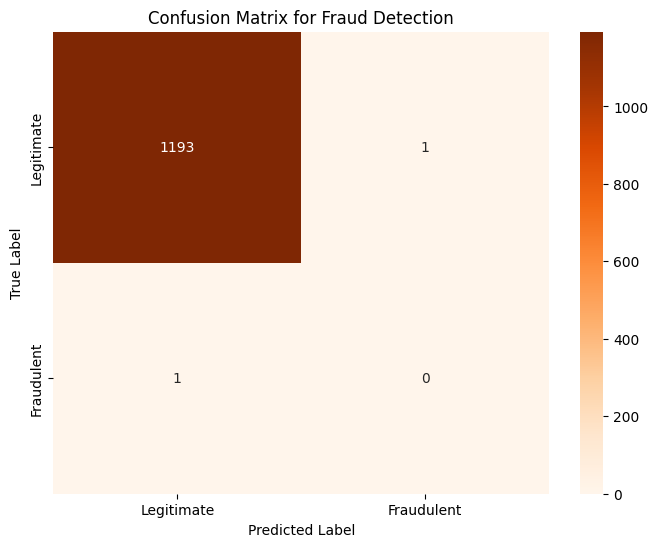

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()